In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from clustering_utils import plot_kmeans
from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture as GMM
from sklearn.decomposition import PCA #(https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)
from clustering_utils import generate_2d_gmm
import warnings

warnings.filterwarnings('ignore')

## Data exploration

In [2]:
df_seeds = pd.read_csv('seeds.csv')
df_seeds.head()

,area,perimeter,compactness,length,width,asymmetry,groove_length
0,15.26,14.84,0.871,5.763,3.312,2.221,5.220
1,14.88,14.57,0.881,5.554,3.333,1.018,4.956
2,14.29,14.09,0.905,5.291,3.337,2.699,4.825
3,13.84,13.94,0.895,5.324,3.379,2.259,4.805
4,16.14,14.99,0.903,5.658,3.562,1.355,5.175


In [3]:
print(df_seeds.shape)
df_seeds.describe()

(210, 7)


,area,perimeter,compactness,length,width,asymmetry,groove_length
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.871000,5.628533,3.258605,3.700200,5.408071
std,2.909699,1.305959,0.023594,0.443063,0.377714,1.503559,0.491480
min,10.590000,12.410000,0.808000,4.899000,2.630000,0.765000,4.519000
25%,12.270000,13.450000,0.857250,5.262250,2.944000,2.561500,5.045000
50%,14.355000,14.320000,0.873500,5.523500,3.237000,3.599000,5.223000
75%,17.305000,15.715000,0.887750,5.979750,3.561750,4.768750,5.877000
max,21.180000,17.250000,0.918000,6.675000,4.033000,8.456000,6.550000


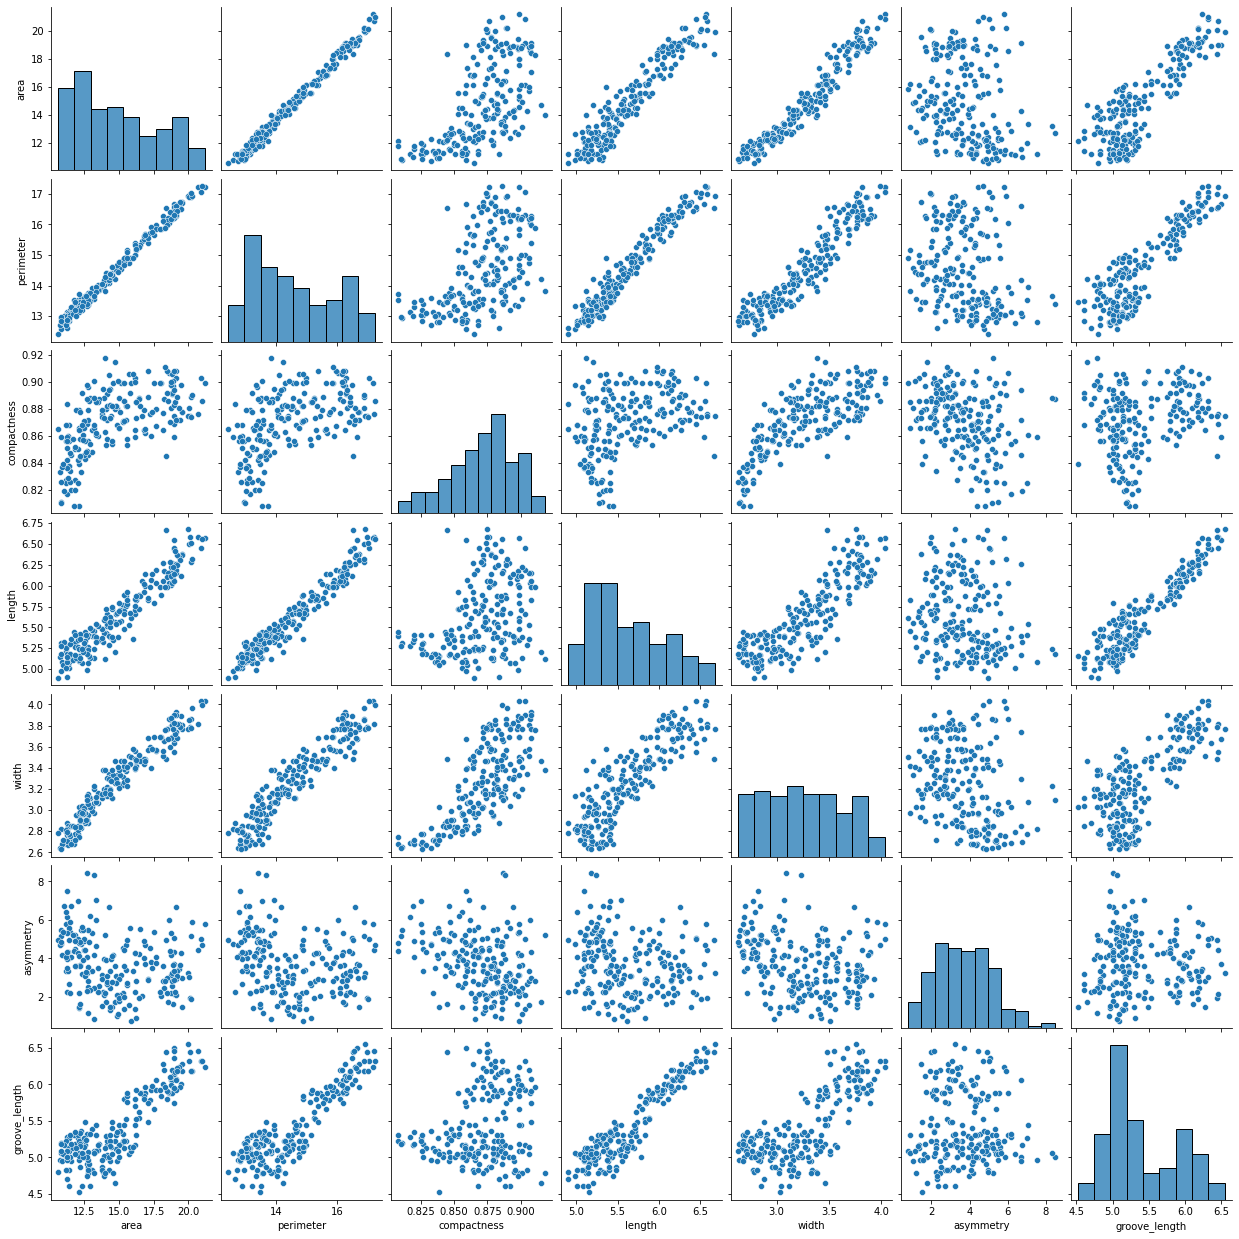

In [4]:
sns.pairplot(df_seeds);

By looking at a heatmap of the correlations we see that **most** of the features have moderate to strong positive correlation with each other, except for the asymmetry feature which is negatively correlated with every feature

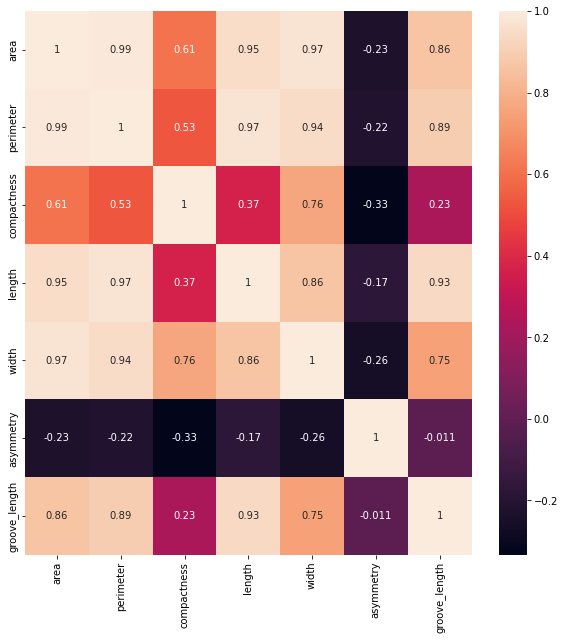

In [5]:
plt.figure(figsize=(10,10))
sns.heatmap(df_seeds.corr(), annot=True);

By using info() we see there are no missing values in the dataset

Also, by looking at the sum of dulicate samples we see there are 0

In [7]:
df_seeds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   area           210 non-null    float64
 1   perimeter      210 non-null    float64
 2   compactness    210 non-null    float64
 3   length         210 non-null    float64
 4   width          210 non-null    float64
 5   asymmetry      210 non-null    float64
 6   groove_length  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


In [8]:
df_seeds.duplicated().sum()

0

## K-means clustering
First, to use K-means clustering the data should to be normalised.

It returns an the data as arrays that have means of 0 and standard deviations of 1.

In [9]:
scaler = StandardScaler()
scaled_seeds = scaler.fit_transform(df_seeds)

In [10]:
scaled_seeds

array([[ 0.14209777,  0.21546244,  0.        , ...,  0.14170182,
        -0.9861499 , -0.38357742],
       [ 0.01118803,  0.00822376,  0.42484468, ...,  0.19743223,
        -1.78816338, -0.92201349],
       [-0.19206658, -0.36020056,  1.44447192, ...,  0.20804754,
        -0.66747788, -1.18919199],
       ...,
       [-0.56757084, -0.69024735,  0.72223596, ..., -0.07060448,
         3.07658503, -0.71806043],
       [-1.03608992, -1.03564515, -0.8072049 , ..., -1.12152071,
        -0.06813448, -0.7425348 ],
       [-0.87762023, -0.93586356, -0.1274534 , ..., -0.75529233,
         1.2912217 , -0.70378372]])

Next, we will use the elbow method to find the optimal number of clusters. Inertia against k number of clusters is plotted and the point at which inertia stops descreasing linearly is chosen as the optimal number of clusters.

The inertia is the sum of squared distances of samples to their closest cluster center.

We see that the elbow point is at k=3, so the optimal number of clusters we will use is 3.

In [14]:
clusters = []

for k in range (1, 12):
    km = KMeans(n_clusters=k, n_init=12, random_state=300)
    km = km.fit(scaled_seeds)
    clusters.append(km.inertia_)

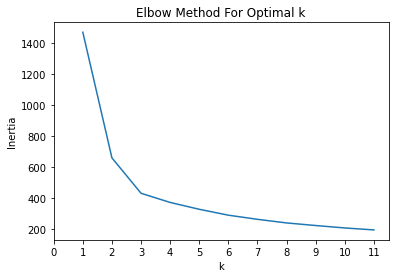

In [15]:
plt.plot(range(1, 12), clusters)
plt.xticks(np.arange(0, 12, step=1))
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k');

Next we will make a model using out number of clusters as 3, and fit the data to it.

In [17]:
k_means = KMeans(n_clusters= 3, n_init= 30, random_state=42)

k_means.fit(scaled_seeds)

y_pred = k_means.predict(scaled_seeds)

Looking at what the predictions looks like they are nearly evenly spready between the 3 clusters

Cluster 1 has the most samples are cluster 0 has the least (but only 5 less than cluster 1)

In [18]:
y_pred

array([2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1, 2, 2,
       2, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 2, 0, 2, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1])

In [19]:
np.array(np.unique(y_pred, return_counts=True)).T

array([[ 0, 67],
       [ 1, 72],
       [ 2, 71]], dtype=int64)

The coordinates of the cluster centers that the model predicted are as below.

Cluster 1 has 6 of 7 negative dimensions, whereas cluster 0 only has 1 negative dimension. Cluster 2 has 5 negative dimensions for the cluster center

In [20]:
k_means.cluster_centers_

array([[ 1.25668163,  1.26196622,  0.56117544,  1.23788278,  1.16485187,
        -0.04521867,  1.29230787],
       [-1.03025257, -1.00664879, -0.96534153, -0.89768501, -1.08558344,
         0.69480427, -0.62480856],
       [-0.14111949, -0.17004259,  0.44937797, -0.25781445,  0.00164694,
        -0.6619191 , -0.58589311]])

## PCA

Principle component analysis (PCA) can be used to reduce the number of features, making it easier to visualise the clusters we get from k-means clustering.

We will reduce the dimensions to 2 so we can plot on a 2d graph.

The predicted cluster label for each sample will remain the same.

In [21]:
pca = PCA(n_components=2).fit_transform(scaled_seeds)

In [22]:
pca_df = pd.DataFrame(pca, columns=['pca1','pca2'])
pca_df['label'] = y_pred
pca_df

,pca1,pca2,label
0,0.317078,0.783940,2
1,-0.004093,1.911672,2
2,-0.458216,1.907800,2
3,-0.596876,1.920389,2
4,1.099266,2.059811,2
...,...,...,...
205,-1.994188,0.859613,1
206,-2.728452,-0.210375,1
207,-1.406693,-1.306413,1
208,-2.340885,0.097664,1


We will also perform PCA on the cluster centers so we can plot them on the same graph.

In [23]:
pca_cent = PCA(n_components=2).fit_transform(k_means.cluster_centers_)

By reducing the data we can now visualise the clusters.

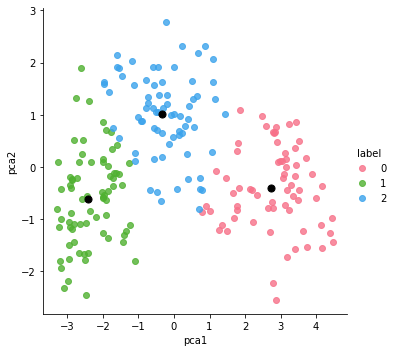

In [24]:
sns.lmplot( x='pca1', y='pca2', data=pca_df, fit_reg=False, hue='label', legend=True, palette='husl')
# Model cluster centers
plt.scatter(pca_cent[:, 0], pca_cent[:, 1], c='black', marker='o', s=50);

**Gaussian Mixture Models (GMM)**

We will use GMM instead of something like DBScan here since it is considered an extension on k-means so it will be interesting to compare the results of them.

The features do not need to be normalised for GMM so we will use df_seeds instead of scaled_seeds

To find the optimal number of components to use we will look at AIC and BIC scores
* both AIC and BIC scores stop linearly decreasing at n=4 components

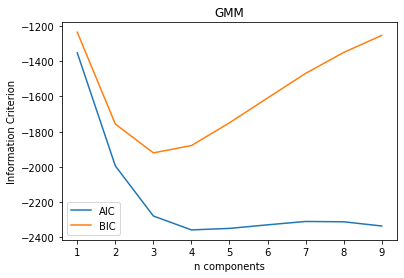

In [25]:
n_components = range(1, 10)

models = [GMM(n, covariance_type='full', random_state=0).fit(df_seeds)
          for n in n_components]

plt.plot(n_components, [m.aic(df_seeds)
         for m in models], label='AIC')
plt.plot(n_components, [m.bic(df_seeds)
         for m in models], label='BIC')
plt.title('GMM')
plt.ylabel('Information Criterion')
plt.xlabel('n components')
plt.legend();

Again, since we have more dimensions than we can plot we will use PCA to reduce the dimenions to 2 so we can visualise the clusters.

In [26]:
pca2 = PCA(n_components=2).fit_transform(df_seeds)

In [27]:
pca2_df = pd.DataFrame(pca2, columns=['pca1','pca2'])
pca2_df

,pca1,pca2
0,0.663448,-1.417320
1,0.315666,-2.689228
2,-0.660499,-1.131506
3,-1.055278,-1.621188
4,1.619997,-2.183382
...,...,...
205,-3.041874,-0.473125
206,-4.109063,0.109342
207,-2.500036,4.307966
208,-3.332079,-0.525289


Next, we will fit the model with the seeds data, using the 4 components.

In [28]:
gmm_seeds = GMM(n_components=4, n_init=20, random_state=42)
gmm_seeds.fit(pca2_df)
y_gmm_seeds = gmm_seeds.predict(pca2_df)

In [29]:
pca2_df['label'] = y_gmm_seeds

Cluster 3 only has 3 samples but the other 3 clusters look like they have a similar spread to the kmeans clusters
* The largest cluster (1) has 75 samples
* This is followed by label 2 with 68 samples
* Then label 0 with 49
* Finally cluster 3 has 18 samples

In [30]:
np.array(np.unique(y_gmm_seeds, return_counts=True)).T

array([[ 0, 36],
       [ 1, 78],
       [ 2, 72],
       [ 3, 24]], dtype=int64)

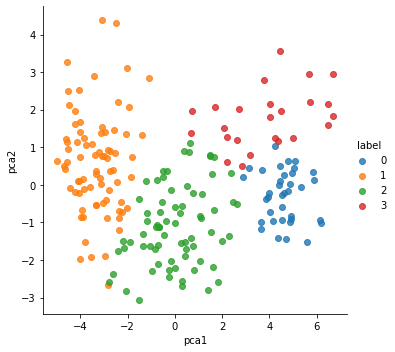

In [31]:
sns.lmplot( x='pca1', y='pca2', data=pca2_df, fit_reg=False, hue='label', legend=True);

Using generate_2d_gmm we can see the contour lines to see more in depth how the gmm model has decided to cluster the data.

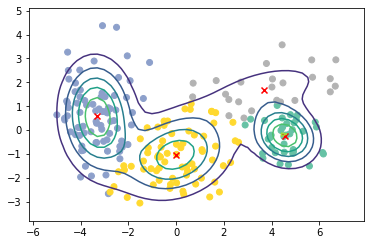

In [32]:
generate_2d_gmm(gmm_seeds, pca2)

Finally, we will compare k means to GMM for the different number of clusters on the same normalised pca data 

It looks like kmeans tends to distribute samples among the clusters more evenly than gmm.

The biggest difference can be seen in n=4 clusters.

In [33]:
pca_comp = pd.DataFrame(pca, columns=['pca1','pca2'])

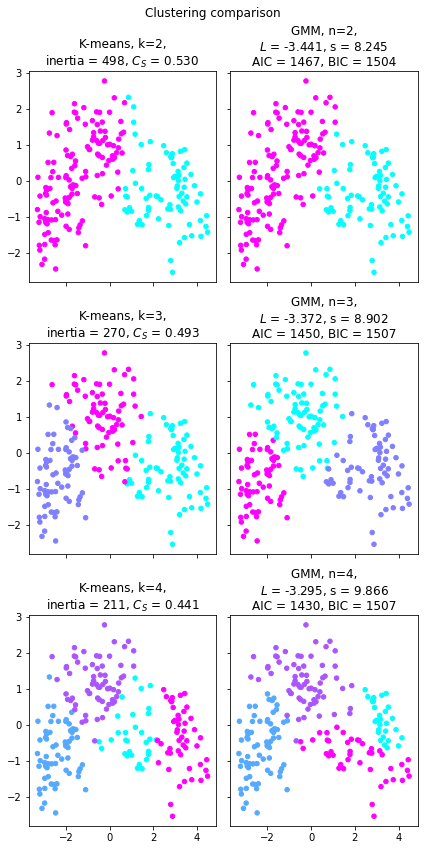

In [34]:
fig, ax = plt.subplots(3, 2, sharey=True, sharex=True, figsize=(6, 12))
fig.suptitle('Clustering comparison')

c_num = np.arange(2, 5)

for n in c_num:
    inst = n - c_num[0]
    km_seeds = KMeans(n_clusters=n, n_init=20, random_state=42)
    gmm_seeds = GMM(n_components=n, n_init=20, random_state=42)

    km_seeds.fit(pca_comp)
    gmm_seeds.fit(pca_comp)

    y_km = km_seeds.predict(pca_comp)
    y_gmm = gmm_seeds.predict(pca_comp)

    ax[inst][0].scatter(x='pca1', y='pca2', data=pca_comp, c=y_km, s=20, cmap='cool')
    ax[inst][0].set_title(
        f'K-means, k={n},\n'
        f'inertia = {km_seeds.inertia_:.0f}, $C_S$ = {silhouette_score(pca_comp, km_seeds.labels_):.3f}')
    silhouette_score(pca_comp, km_seeds.labels_)
    ax[inst][1].scatter(x='pca1', y='pca2', data=pca_comp,
                        c=y_gmm, s=20, cmap='cool')
    ax[inst][1].set_title(
        f'GMM, n={n},\n'
        f'$L$ = {gmm_seeds.score(pca_comp):.3f}, s = {np.exp(gmm_seeds.score_samples(pca_comp)).sum():.3f}'
        f'\nAIC = {gmm_seeds.aic(pca_comp):.0f}, BIC = {gmm_seeds.bic(pca_comp):.0f}')
    
plt.tight_layout()

I believe the soft partitions of GMM is more suited to cluster data in most cases, from a glance the clusters for gmm in direct comparison to kmeans look like they make more sense, probably due to the fact it is based on probability rather than distance.